In [1]:
import numpy as np
import matplotlib
import seaborn as sns
from matplotlib import pyplot as plt
import os
import sys

In [2]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from IPython.core.display import clear_output, display

import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
from ariadne.parsing import parse_df
import ariadne.transformations  as trn


In [4]:
from prepare import parse

In [5]:
!ls ../ariadne/

data			   __init__.py	  preprocessing.py   tracknet_v2_2
data_loader.py		   lightning.py   __pycache__	     tracknet_v2_bmn
external_configurables.py  metrics.py	  test		     tracknet_v3
graph_net		   parsing.py	  tracknet_v2	     transformations.py
inferebce_utils.py	   point_net	  tracknet_v2_1      utils
inference_utils.py	   point_net_dev  tracknet_v2_1_bmn  utils.py


In [6]:
elem = '../ariadne/data/bmn_data/bmn_5.txt'
csv_params={
                    "sep": '\s+',
                    #"nrows": 500000,
                    "encoding": 'utf-8',
                    "names":  ['event',  'x', 'y', 'z', 'det','station', 'track', 'px', 'py', 'pz', 'vx', 'vy', 'vz']
                 }
data = parse_df(elem, **csv_params)
sns.set_style('darkgrid')
grouped_df = data.groupby('event')
num_hits = []
num_tracks = []
num_fakes = []
one_event = None
num = 163

In [7]:
from mpl_toolkits.mplot3d import Axes3D

In [8]:
data['station'].value_counts()

0    5075410
1    3921009
2    2547493
3    1348061
4    1108471
5    1042494
Name: station, dtype: int64

In [24]:
for i, ev_data in grouped_df:
    if i>0:
        break
    stations = ev_data.groupby('station').size().max()
    #max_station = max(stations)
    num_hits.append(stations)
    num_fakes.append(len(ev_data[ev_data['track']==-1]))
    num_tracks.append(ev_data[ev_data['track']!=-1].groupby('track').ngroups)
max_num_hits = []
num_events = []
for i in range(1, len(num_hits)):
    max_num_hits.append(np.max(num_hits[:i]))
    num_events.append(i)

15


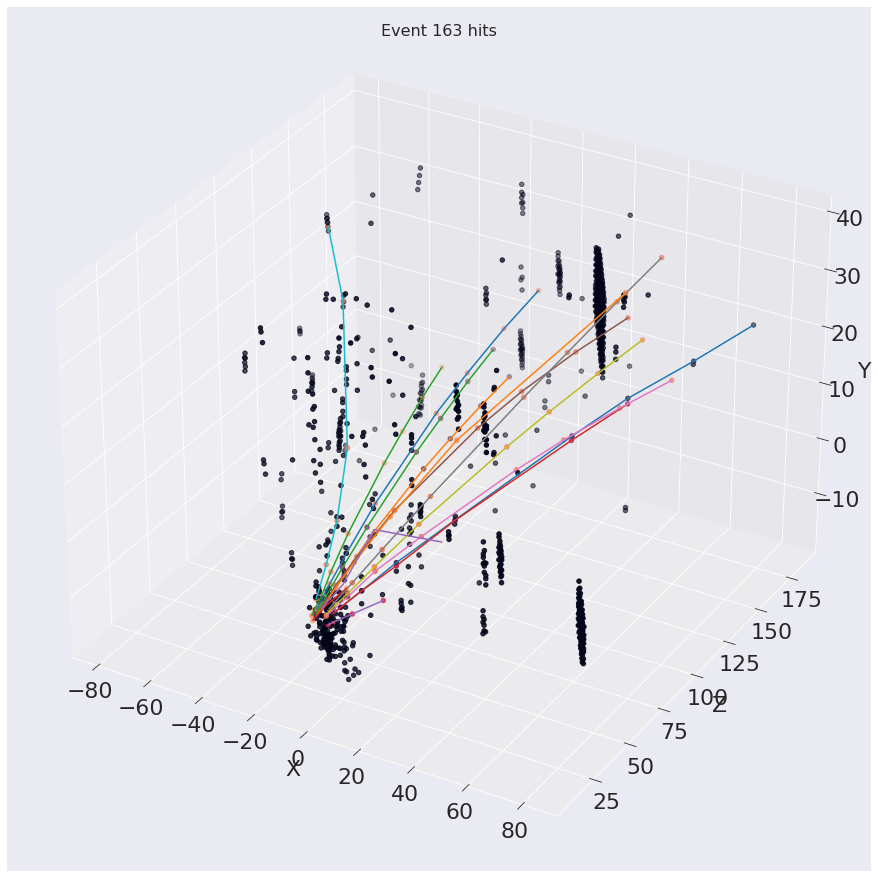

<Figure size 432x288 with 0 Axes>

In [35]:
matplotlib.rcParams.update({'font.size': 22})
from mpl_toolkits.mplot3d import Axes3D
#plt.figure(figsize=(12,12))
print(one_event[one_event['track']!=-1].groupby('track').ngroups)
fig = plt.figure(figsize=(12,12))

ax = Axes3D(fig) # Method 1

ax.scatter(one_event.x, one_event.z, one_event.y, c=one_event['track'])
for j, track in one_event[one_event['track']!=-1].groupby('track'):
    ax.plot(track.x, track.z, track.y)
ax.set_xlabel('X')
ax.set_ylabel('Z')
ax.set_zlabel('Y')
fig.suptitle(f'Event {num} hits', size=16)

before = [0.2734375, 0.20089285714285715,0.2609276729559748,  0.8058823529411764,  0.8563515949591899]
after = [0.42948717948717946, 0.5410628019323671, 0.715251572327044, 0.8372759856630825, 0.883185294165443]
#ticks = np.arange(5,10)
#plt.plot(ticks, before, label='Efficiency before rebalance')
#plt.plot(ticks, after, label='Efficiency after rebalance')
#plt.legend()
plt.show()
#sns.distplot(num_hits).set_title('Histogram of all hits in event')
plt.savefig('event_{num}_hits.png')


In [88]:
import torch

tracknet_ckpt_path_dict = {'model_dir': '/zfs/hybrilit.jinr.ru/user/n/nuvard/ariadne/lightning_logs/TrackNETv2', 
                           'version': 'latest', 'checkpoint': 'latest'}
classifier_ckpt_path_dict = {'model_dir': '/zfs/hybrilit.jinr.ru/user/n/nuvard/ariadne/lightning_logs/TrackNetClassifier', 
                             'version': 'version_108', 'checkpoint': 'latest'}

In [9]:

z_values = {0:12.344, 1: 15.614, 2: 24.499, 3: 39.702, 4: 64.535, 5: 112.649, 6: 135.330,7: 160.6635, 8: 183.668}

In [10]:
one_event = data[data['event']==0]

In [11]:
one_event

,event,x,y,z,det,station,track,px,py,pz,vx,vy,vz
0,0,5.757049,-3.088113,11.979,0,0,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0,5.757049,-3.692584,11.979,0,0,18,0.432272,-0.022226,1.057785,0.556528,-3.442007,-0.975065
2,0,5.697944,-4.441849,11.979,0,0,190,0.320170,-0.066770,0.830373,0.556528,-3.442007,-0.975065
3,0,4.169508,-0.947163,11.979,0,0,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0,4.169508,-1.846688,11.979,0,0,29,0.449598,0.196688,1.571362,0.556528,-3.442007,-0.975065
...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,0,-16.975480,6.333084,183.818,1,5,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
998,0,-16.975480,5.383799,183.818,1,5,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
999,0,-16.975480,4.370174,183.818,1,5,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1000,0,-21.260160,-1.124982,183.818,1,5,45,-0.042387,0.023902,1.738221,0.556528,-3.442007,-0.975065


In [24]:
one_event

,event,x,y,z,det,station,track,px,py,pz,vx,vy,vz,index
0,0,5.757049,-3.088113,11.979,0,0,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,0,5.757049,-3.692584,11.979,0,0,18,0.432272,-0.022226,1.057785,0.556528,-3.442007,-0.975065,1
2,0,5.697944,-4.441849,11.979,0,0,190,0.320170,-0.066770,0.830373,0.556528,-3.442007,-0.975065,2
3,0,4.169508,-0.947163,11.979,0,0,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3
4,0,4.169508,-1.846688,11.979,0,0,29,0.449598,0.196688,1.571362,0.556528,-3.442007,-0.975065,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,0,-16.975480,6.333084,183.818,1,11,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,997
998,0,-16.975480,5.383799,183.818,1,11,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,998
999,0,-16.975480,4.370174,183.818,1,11,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,999
1000,0,-21.260160,-1.124982,183.818,1,11,45,-0.042387,0.023902,1.738221,0.556528,-3.442007,-0.975065,1000


In [ ]:
one_event.loc[one_event.det == 1, 'station'] = one_event.loc[one_event.det == 1, 'station'].values + 3


In [27]:
transformer = trn.Compose([
    trn.DropShort(num_stations=4),
    trn.DropTracksWithHoles(),
    trn.DropSpinningTracks(),
    #@DropFakes(),
    trn.BakeStationValues(values=z_values),]
    #@ToCylindrical(),
    #@ConstraintsNormalize(),
   # @ToBuckets(),
)

transformed = transformer(one_event)



In [29]:
transformed[transformed['track']!=-1]

,event,x,y,z,det,station,track,px,py,pz,vx,vy,vz,index
0,0,4.169508,-1.846688,12.344,0,0,29,0.449598,0.196688,1.571362,0.556528,-3.442007,-0.975065,4
1,0,4.128531,-1.885697,12.344,0,0,132,0.415257,0.180195,1.470553,0.556528,-3.442007,-0.975065,5
2,0,2.658756,0.655364,12.344,0,0,228,0.063607,0.104897,0.326012,0.556528,-3.442007,-0.975065,7
3,0,2.614070,-1.295032,12.344,0,0,205,0.634571,0.658147,3.930407,0.556528,-3.442007,-0.975065,10
4,0,2.206831,-4.148226,12.344,0,0,158,0.057935,-0.017098,0.401667,0.556528,-3.442007,-0.975065,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,0,41.797720,6.493385,183.668,1,8,200,0.377431,0.053282,0.944211,0.556528,-3.442007,-0.975065,932
110,0,-10.091590,16.013770,183.668,1,8,220,0.093399,0.123400,1.165777,0.556528,-3.442007,-0.975065,960
111,0,-48.198130,-2.854925,183.668,1,8,230,-0.543470,0.011242,2.703192,0.556528,-3.442007,-0.975065,973
112,0,-21.260160,-1.124982,183.668,1,8,45,-0.042387,0.023902,1.738221,0.556528,-3.442007,-0.975065,1000


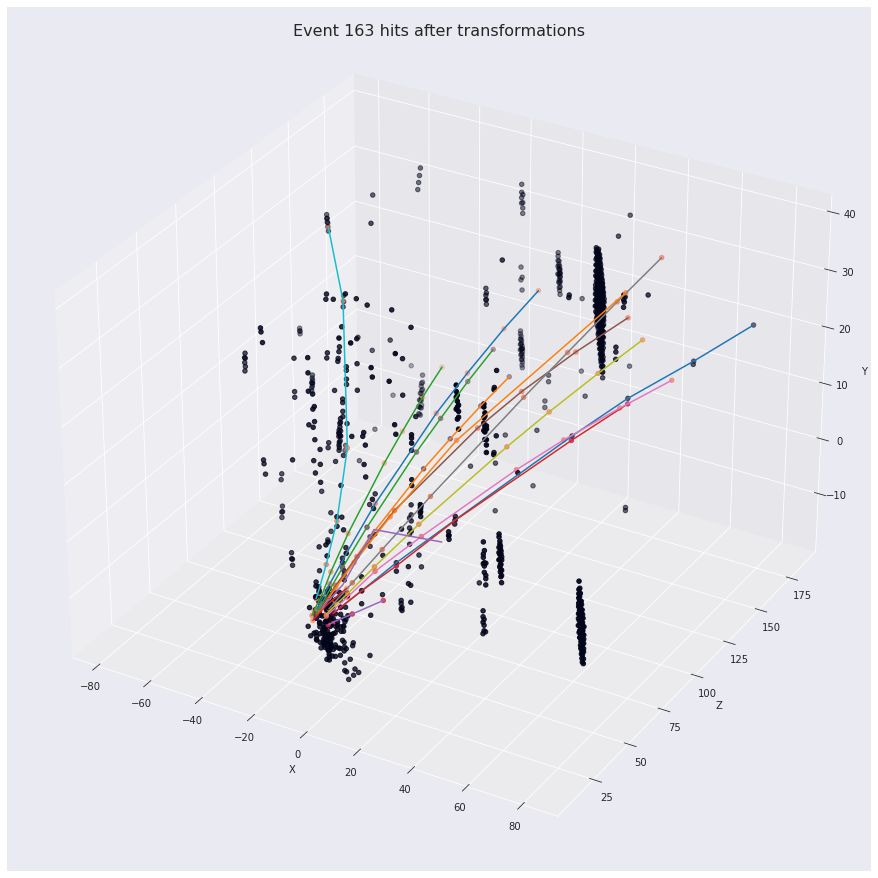

In [30]:
fig = plt.figure(figsize=(12,12))
ax = Axes3D(fig) # Method 1
ax.scatter(transformed.x, transformed.z, transformed.y, c=transformed['track'])
for j, track in transformed[transformed['track']!=-1].groupby('track'):
    ax.plot(track.x, track.z, track.y)
ax.set_xlabel('X')
ax.set_ylabel('Z')
ax.set_zlabel('Y')
fig.suptitle(f'Event {num} hits after transformations', size=16)
plt.show()

In [12]:
from ariadne.utils import get_checkpoint_path, weights_update
from ariadne.tracknet_v2.model import TrackNETv2
from ariadne.tracknet_v2_1.model import TrackNetClassifier

In [13]:
tracknet_input_features=3
tracknet_conv_features=32
DEVICE='cpu'

In [89]:
path_to_tracknet_ckpt = get_checkpoint_path(**tracknet_ckpt_path_dict)
path_to_classifier_ckpt = get_checkpoint_path(**classifier_ckpt_path_dict)

model = weights_update(model=TrackNETv2(input_features=tracknet_input_features,
                                        conv_features=tracknet_conv_features,
                                        rnn_type='gru',
                                        batch_first=True),
                       checkpoint=torch.load(path_to_tracknet_ckpt, map_location=torch.device(DEVICE)))
model.eval()

TrackNETv2(
  (conv): Sequential(
    (0): Conv1d(3, 32, kernel_size=(3,), stride=(1,), padding=(1,), bias=False)
    (1): ReLU()
    (2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (rnn): GRU(32, 32, num_layers=2, batch_first=True)
  (xy_coords): Sequential(
    (0): Linear(in_features=32, out_features=2, bias=True)
  )
  (r1_r2): Sequential(
    (0): Linear(in_features=32, out_features=2, bias=True)
    (1): Softplus(beta=1, threshold=20)
  )
)

In [90]:
model.to(DEVICE)

TrackNETv2(
  (conv): Sequential(
    (0): Conv1d(3, 32, kernel_size=(3,), stride=(1,), padding=(1,), bias=False)
    (1): ReLU()
    (2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (rnn): GRU(32, 32, num_layers=2, batch_first=True)
  (xy_coords): Sequential(
    (0): Linear(in_features=32, out_features=2, bias=True)
  )
  (r1_r2): Sequential(
    (0): Linear(in_features=32, out_features=2, bias=True)
    (1): Softplus(beta=1, threshold=20)
  )
)

In [15]:
from ariadne.utils import load_data, store_in_index,search_in_index
from ariadne.graph_net.graph_utils.graph_prepare_utils import to_pandas_graph_from_df


from ariadne.transformations import Compose, ConstraintsNormalize, ToCylindrical, DropSpinningTracks, DropShort

In [17]:
import itertools

def get_seeds(hits, columns=['x','y','z']):
    temp1 = hits[hits.station == 0]
    st0_hits = hits[hits.station == 0][columns].values
    temp2 = hits[hits.station == 1]
    st1_hits = hits[hits.station == 1][columns].values
    # all possible combinations
    idx0 = range(len(st0_hits))
    idx1 = range(len(st1_hits))
    idx_comb = itertools.product(idx0, idx1)
    # unpack indices
    idx0, idx1 = zip(*idx_comb)
    idx0 = list(idx0)
    idx1 = list(idx1)
    # create seeds array
    seeds = np.zeros((len(idx0), 2, 3))
    seeds[:, 0, ] = st0_hits[idx0]
    seeds[:, 1, ] = st1_hits[idx1]
    return seeds

In [16]:
_columns=('x', 'y', 'z')   

In [66]:
NUM_COMPONENTS = 2
SUFX = ['_p', '_c']
COLS = ['x', 'y', 'z']

def build_index(target_df):
    cont = np.ascontiguousarray(target_df[COLS].values)
    return store_in_index(cont, num_components = 3)

def build_hits(target_df):
    cont = np.ascontiguousarray(target_df[COLS].values)
    return cont

def search(points, index):
    cont = np.ascontiguousarray(points[COLS].values)
    return search_in_index(cont, index, 10, n_dim=3)

def to_cart(df):
    graph=to_pandas_graph_from_df(df,SUFX, save_index=False)
    seeds = graph[(graph.station_p == 0) & (graph.station_c == 1)]
    target = df[df.station == 2]
    return seeds, target

def seeds_to_input(seeds_df):
    return seeds_df[['x_p', 'y_p', 'z_p', 'x_c', 'y_c', 'z_c']].values.reshape((-1, 2, 3))

def process_one_event(event_df):
    event_df.loc[event_df["det"] == 1, 'station'] = event_df.loc[event_df["det"] == 1, 'station'].values + 3
    event_df = event_df[['event','x','y','z','station','track']]
    try:
        event_df = transformer(event_df)
    except AssertionError as err:
        print("ASS error %r" % err)
        return None
    event_df.rename(columns={'index': 'index_old'}, inplace=True)
    preds, labels = go_over_stations(event_df, max_n_stations=9)
    return preds, labels, event_df
    #return seeds, target

In [44]:
temp  = one_event[['x','y','z']][:10]

In [45]:
index = build_index(temp)

In [46]:
search

array([[0, 1, 3, 5, 6, 2, 4, 9, 8, 7],
       [1, 0, 3, 5, 6, 2, 4, 9, 8, 7],
       [2, 3, 0, 1, 5, 6, 4, 9, 7, 8],
       [3, 5, 1, 0, 6, 2, 4, 9, 8, 7],
       [4, 6, 5, 3, 1, 0, 9, 2, 8, 7],
       [5, 6, 3, 4, 1, 0, 2, 9, 8, 7],
       [6, 5, 4, 3, 1, 0, 2, 9, 8, 7],
       [7, 8, 9, 6, 5, 4, 3, 2, 1, 0],
       [8, 7, 9, 6, 5, 4, 3, 2, 1, 0],
       [9, 7, 8, 6, 5, 4, 3, 2, 1, 0]])

In [19]:
def get_data_for_empty_ellipses(x, preds, grus, mask):
    empty_ellipses_mask = (mask.sum(axis=-1) == 0) # if nothing is found in ellipse
    empty_ellipses = preds[empty_ellipses_mask]#.detach().cpu().numpy()
    empty_xs = x[empty_ellipses_mask]
    empty_grus = grus[empty_ellipses_mask]#.detach().cpu().numpy()
    return empty_xs, empty_ellipses, empty_grus

In [20]:
from ariadne.utils import *

In [21]:
import gin

In [22]:
gin.enter_interactive_mode()

In [28]:
def get_tracks(df, min_len=4):
    tracks = df[df['track'] != -1].groupby('track')
    multiplicity = tracks.ngroups
    tracks_vs_len = {3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}
    all_tracks = []
    for i, track in tracks:
        temp_track = track[['x', 'y', 'z']].values
        if len(temp_track) >= min_len:
            tracks_vs_len[len(temp_track)].append(temp_track)
            all_tracks.append(temp_track)
    for stations_in_track, this_track_list in tracks_vs_len.items():
        if len(this_track_list) > 0:
            tracks_vs_len[stations_in_track] = np.stack(this_track_list, 0)
    return tracks_vs_len, all_tracks, multiplicity

In [38]:
def get_labels(gt_tracks, predicted_tracks, use_torch=False, device='cuda'):
    """THIS IS A MESS!"""
    torch.cuda.empty_cache()
    if use_torch:
        labels_for_ellipses = torch.zeros(len(predicted_tracks), dtype=torch.bool, device=device)
        assert len(predicted_tracks) > 0, 'Can not compute labels for empty set of tracks!'
        if len(gt_tracks) > 0:
            expanded_tracks = gt_tracks.unsqueeze(0).repeat((len(predicted_tracks), 1, 1, 1))
            expanded_xs = predicted_tracks.unsqueeze(1).repeat((1, expanded_tracks.shape[1], 1,1))
            labels_for_ellipses += torch.any(torch.all(torch.all(torch.isclose(expanded_tracks.float(), expanded_xs.float().to(device)), dim=-1), dim=-1),
                                             dim=-1)
            assert len(labels_for_ellipses) == len(expanded_xs), 'length of labels and xs is different!'
        labels_for_ellipses_numpy = labels_for_ellipses.detach().cpu().numpy()
        del labels_for_ellipses
        return labels_for_ellipses_numpy
    else:
        labels_for_ellipses = np.zeros(len(predicted_tracks), dtype=bool)
        assert len(predicted_tracks) > 0, 'Can not compute labels for empty set of tracks!'
        if len(gt_tracks) > 0:
            expanded_tracks = np.expand_dims(gt_tracks, 0).repeat(len(predicted_tracks), 0)
            expanded_xs = np.expand_dims(predicted_tracks, 1).repeat(expanded_tracks.shape[1], 1)
            labels_for_ellipses += np.any(
                np.all(np.all(np.equal(expanded_tracks, expanded_xs), axis=-1),
                       axis=-1), axis=-1)
            assert len(labels_for_ellipses) == len(expanded_xs), 'length of labels and xs is different!'
    return labels_for_ellipses

def prolong(x, gru, nearest_hits_mask, nearest_hits, stations_gone, use_torch=False):
    if use_torch:
        xs_for_prolong = x.unsqueeze(1).repeat((1, nearest_hits_mask.shape[-1], 1,1))
        grus_for_prolong = gru.unsqueeze(1).repeat((1, nearest_hits_mask.shape[-1], 1,1))
        prolonged_xs = torch.zeros((len(xs_for_prolong),
                                    nearest_hits_mask.shape[-1],
                                    xs_for_prolong.shape[2] + 1,
                                    3))
        prolonged_xs[:, :, :xs_for_prolong.shape[2], :] = xs_for_prolong
        prolonged_xs[:, :, xs_for_prolong.shape[2], :] = nearest_hits
        prolonged_xs = prolonged_xs[nearest_hits_mask].reshape(-1, stations_gone + 1, 3)
        prolonged_grus = grus_for_prolong[nearest_hits_mask].reshape(-1,
                                                                     grus_for_prolong.shape[-2],
                                                                     grus_for_prolong.shape[-1])
    else:
        xs_for_prolong = np.expand_dims(x, 1).repeat(nearest_hits_mask.shape[-1], 1)
        grus_for_prolong = np.expand_dims(gru.detach().cpu().numpy(), 1).repeat(nearest_hits_mask.shape[-1], 1)
        prolonged_xs = np.zeros(
            (len(xs_for_prolong), nearest_hits_mask.shape[-1], xs_for_prolong.shape[2] + 1, 3))

        prolonged_xs[:, :, :xs_for_prolong.shape[2], :] = xs_for_prolong
        prolonged_xs[:, :, xs_for_prolong.shape[2], :] = nearest_hits
        prolonged_xs = prolonged_xs[nearest_hits_mask].reshape(-1, stations_gone + 1, 3)
        prolonged_grus = grus_for_prolong[nearest_hits_mask].reshape(-1,
                                                                     grus_for_prolong.shape[-2],
                                                                     grus_for_prolong.shape[-1])
    return prolonged_xs, prolonged_grus

In [101]:
def go_over_stations(df, max_n_stations=9):
    max_batch_size = 256
    tracks_vs_len, all_tracks, multiplicity = get_tracks(df)
    print(tracks_vs_len)
    seeds, target = to_cart(df)
    #index = build_index(target)
    # search(target[:2], index)
    chunk_data_x = seeds_to_input(seeds)
    chunk_data_len = torch.tensor(np.full(len(chunk_data_x), 2), dtype=torch.int64).to(DEVICE)
    gru_candidates = []
    x_candidates = []
    candidate_labels = []
    for stations_gone in range(2, max_n_stations):
        print(f'===> {stations_gone}')
        num_batches = int(len(chunk_data_x) / max_batch_size) + 1
        num_right_batches = 0
        num_all_batches = 0
        next_stage_xs = []
        next_stage_lens = []
        if len(chunk_data_x) == 0:
            print('Have zero ellipces on this station! Skipping other stations')
            break
        labels_for_empty_el_batch = []
        labels_for_full_el_batch = []
        station_df = df[df['station']==stations_gone]
        current_index = build_index(station_df)
        this_station_hits = build_hits(station_df)
        for batch_num in range(num_batches):
            min_i = max_batch_size*batch_num
            max_i = min(max_batch_size + min_i, len(chunk_data_x))
            if min_i==max_i:
                print('Have zero ellipces on this station! Skipping other stations')
                break
            
            this_batch_x = torch.tensor(chunk_data_x[min_i: max_i]).to(DEVICE)
            this_batch_len = chunk_data_len[min_i: max_i]
            batch_prediction, batch_gru = model(this_batch_x,
                                                     torch.tensor(this_batch_len, dtype=torch.int64).to(DEVICE),
                                                     return_gru_states=True)
            new_pred = torch.full((len(batch_prediction), 5), z_values[stations_gone], device=DEVICE)
            new_pred[:, :2] = batch_prediction[:, -1, :2]
            new_pred[:, 3:] = batch_prediction[:, -1, 2:]
            batch_prediction = new_pred
            if batch_num == 0:
                print(f'station {stations_gone+1}, on this station: {len(this_station_hits)} hits' )
            if len(this_station_hits) == 0:
                LOGGER.info('Have zero hits on this station! Skipping other stations')
                break
            prediction_numpy = batch_prediction.detach().cpu().numpy()
            nearest_hits_index = search_in_index(prediction_numpy[:, :3],
                                                 current_index, 
                                                 30,
                                                 n_dim=3)
            nearest_hits = this_station_hits[nearest_hits_index]
            nearest_hits, in_ellipse_mask = filter_hits_in_ellipses(prediction_numpy,
                                                               nearest_hits,
                                                               nearest_hits_index,
                                                               filter_station=False,
                                                               z_last=True,
                                                               find_n=nearest_hits_index.shape[1])
            nearest_hits = torch.from_numpy(nearest_hits)
            nearest_hits_mask = in_ellipse_mask 
            # here empty ellipses and all inputs for them are saved
            empty_xs, empty_ellipses, empty_grus = get_data_for_empty_ellipses(this_batch_x, 
                                                                               batch_prediction, 
                                                                               batch_gru, 
                                                                               nearest_hits_mask)
            prolonged_batch_xs, prolonged_grus = prolong(this_batch_x,
                                                         batch_gru,
                                                         nearest_hits_mask,
                                                         nearest_hits,
                                                         stations_gone,
                                                         use_torch=True)
            next_stage_xs.append(prolonged_batch_xs)
            next_stage_lens.append(np.full(len(prolonged_batch_xs), stations_gone + 1))
            if stations_gone > 3:
                use_empty_ellipses = []
                empty_ellipses_station_intersections = []
                orig_ellipses = torch.zeros((len(empty_ellipses), 4))
                orig_ellipses[:, :2] = empty_ellipses[:, :2]
                orig_ellipses[:, 2:] = empty_ellipses[:, 3:]
                 #are_ellipses_on_station = is_ellipse_intersects_station_tensor(orig_ellipses,
                 #                                                               self.stations_sizes[stations_gone].tolist())
                 #use_empty_ellipses.append(True)  # вот тут я убрала фильтр по станции!
                use_empty_ellipses = torch.ones(len(orig_ellipses), dtype=torch.bool)
                empty_xs = empty_xs[use_empty_ellipses]
                empty_grus = empty_grus[use_empty_ellipses]
                if len(empty_xs) > 0:
                    (candidate_labels, 
                     labels_for_empty_el_batch, 
                     gru_candidates, 
                     x_candidates) =  get_candidates(empty_xs, 
                                                     tracks_vs_len[stations_gone],
                                                     prolonged_grus[:, -2], 
                                                     candidate_labels, 
                                                     labels_for_full_el_batch, 
                                                     gru_candidates, 
                                                     x_candidates)
            if (stations_gone == (max_n_stations-1)): # if we are predicting for last station
                if len(prolonged_batch_xs) > 0:  # now we prolong candidates with all hits *in* ellipses
                    (candidate_labels,
                     labels_for_full_el_batch, 
                     gru_candidates, 
                     x_candidates) =  get_candidates(prolonged_batch_xs, 
                                                     tracks_vs_len[stations_gone + 1],
                                                     prolonged_grus[:, -1], 
                                                     candidate_labels, 
                                                     labels_for_full_el_batch, 
                                                     gru_candidates, 
                                                     x_candidates)
        if len(next_stage_xs) > 1:
            chunk_data_x = np.concatenate(next_stage_xs, 0)
            chunk_data_len = np.concatenate(next_stage_lens, 0)
        else:
            try:
                chunk_data_x = next_stage_xs[0]
                chunk_data_len = next_stage_lens[0]
            except:
                continue
    return x_candidates, candidate_labels

In [102]:
def get_candidates(preds, targets, grus, labels, labels_for_batch, gru_candidates, track_candidates):
    labels_for_ellipses = get_labels(torch.tensor(targets,device=DEVICE),
                                     preds,
                                     use_torch=True,
                                     device=DEVICE)
    labels_for_batch.append(labels_for_ellipses)
    gru_candidates.extend(grus)  # because we need gru for predicted ellipse
    labels.extend(labels_for_ellipses)
    track_candidates.extend(prolonged_batch_xs)
    return labels, labels_for_batch, gru_candidates, track_candidates

In [103]:
one_event

,event,x,y,z,det,station,track,px,py,pz,vx,vy,vz
0,0,5.757049,-3.088113,11.979,0,0,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0,5.757049,-3.692584,11.979,0,0,18,0.432272,-0.022226,1.057785,0.556528,-3.442007,-0.975065
2,0,5.697944,-4.441849,11.979,0,0,190,0.320170,-0.066770,0.830373,0.556528,-3.442007,-0.975065
3,0,4.169508,-0.947163,11.979,0,0,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0,4.169508,-1.846688,11.979,0,0,29,0.449598,0.196688,1.571362,0.556528,-3.442007,-0.975065
...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,0,-16.975480,6.333084,183.818,1,8,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
998,0,-16.975480,5.383799,183.818,1,8,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
999,0,-16.975480,4.370174,183.818,1,8,-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1000,0,-21.260160,-1.124982,183.818,1,8,45,-0.042387,0.023902,1.738221,0.556528,-3.442007,-0.975065


In [104]:
one_event = data[data.event == 0]
preds, labels, event_df = process_one_event(one_event)


{3: [], 4: array([[[ 2.206831, -4.148226, 12.344   ],
        [ 2.680053, -4.301381, 15.614   ],
        [ 4.370823, -4.813928, 24.499   ],
        [ 7.519342, -5.553101, 39.702   ]],

       [[-3.494453, -4.224186, 12.344   ],
        [-4.188253, -4.386579, 15.614   ],
        [-5.446515, -4.759852, 24.499   ],
        [-6.373987, -5.417351, 39.702   ]]]), 5: array([[[ 0.1562779, -1.538111 , 12.344    ],
        [ 0.2796341, -1.097775 , 15.614    ],
        [ 0.946032 , -0.172354 , 24.499    ],
        [ 4.301402 ,  6.456415 , 39.702    ],
        [16.00282  ,  0.2570905, 64.535    ]]]), 6: array([[[  2.658756 ,   0.6553643,  12.344    ],
        [  3.343926 ,   1.700543 ,  15.614    ],
        [  5.303983 ,   4.357539 ,  24.499    ],
        [ 10.3557   ,   9.522198 ,  39.702    ],
        [ 21.53152  ,  18.76442  ,  64.535    ],
        [ 58.00927  ,  38.52792  , 112.649    ]]]), 7: array([[[  4.128531 ,  -1.885697 ,  12.344    ],
        [  5.05668  ,  -1.466706 ,  15.614    ],
   

NameError: name 'prolonged_batch_xs' is not defined

In [92]:
preds

[array([[ 4.169508 , -1.846688 , 12.344    ],
        [ 5.111703 , -1.412612 , 15.614    ],
        [-4.816265 , -2.535451 , 24.499    ],
        [-7.752183 , -0.2738535, 39.702    ]], dtype=float32),
 array([[  4.169508,  -1.846688,  12.344   ],
        [  5.111703,  -1.412612,  15.614   ],
        [ -3.939527,  -2.66169 ,  24.499   ],
        [-26.86182 ,  -3.190219,  39.702   ]], dtype=float32),
 array([[  4.169508,  -1.846688,  12.344   ],
        [  5.111703,  -1.412612,  15.614   ],
        [ -3.939527,  -2.66169 ,  24.499   ],
        [-27.15807 ,  -3.169507,  39.702   ]], dtype=float32),
 array([[  4.169508,  -1.846688,  12.344   ],
        [  5.111703,  -1.412612,  15.614   ],
        [ -3.939527,  -2.66169 ,  24.499   ],
        [-26.86182 ,  -4.275144,  39.702   ]], dtype=float32),
 array([[ 4.169508 , -1.846688 , 12.344    ],
        [ 5.05668  , -1.466706 , 15.614    ],
        [-4.816265 , -2.535451 , 24.499    ],
        [-7.752183 , -0.2738535, 39.702    ]], dtype=float

In [93]:
np.sum(labels)

0

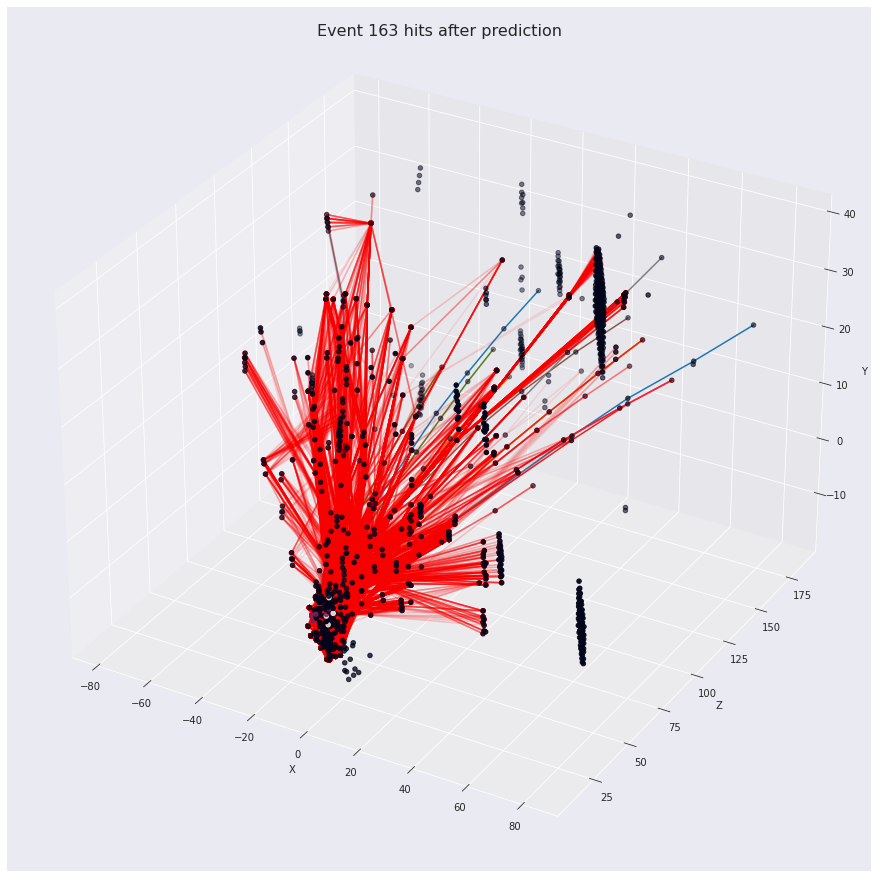

In [96]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import mpl_toolkits.mplot3d.art3d as art3d

def seeds_to_lines(seeds):
    return seeds[['x_p',  'y_c', 'z_p', 'x_c','y_p', 'z_c']].values.reshape((-1, 3, 2))

def draw_track(ax, seed, colors_tracks):
    if not seed.track:
        col = (0.0, 0.0, 0.000, 0.9)
    else:
        col = colors_tracks[seed.track_p]

    val_x = seed[['z_p', 'z_c']].values
    val_y = seed[['x_p', 'x_c']].values
    val_z = seed[['y_p', 'y_c']].values
    
    ax.plot(val_x, val_y, zs=val_z, color=col)
    ax.scatter(val_x, val_y, zs=val_z, color=col)
    
def draw_track_from_numpy(ax, track,label):
    if label:
        col = (0., 1.0, 0.000, 0.1)    
    else:
        col = (1, 0.0, 0.000, 0.1)
    val_x = track[:,0]
    val_y = track[:,2]
    val_z = track[:,1]
    ax.plot(val_x, val_y, zs=val_z, color=col)
    ax.scatter(val_x, val_y, zs=val_z, color=col)

def visual_predict(df, pred, labels, min_pred_num=0, max_pred_num=10):
    #for p in pred:
    #    print(p)
    #    return
    fig = plt.figure(figsize=(12,12))
    ax = Axes3D(fig) # Method 1
    for j, track in df[df['track']!=-1].groupby('track'):
        ax.plot(track.x, track.z, track.y)
    for i, (track,label) in enumerate(zip(pred,labels)):
        if i >= min_pred_num and i <=max_pred_num:
            draw_track_from_numpy(ax, track, label)
    ax.scatter(df.x, df.z, df.y, c=transformed['track'])
    ax.set_xlabel('X')
    ax.set_ylabel('Z')
    ax.set_zlabel('Y')
    fig.suptitle(f'Event {num} hits after prediction', size=16)
    plt.show()

visual_predict(event_df, preds,labels, 0, 13000)